# **1. Perkenalan Dataset**


**Sumber Dataset**:  
[Agriculture Crop Yield](https://www.kaggle.com/datasets/samuelotiattakorah/agriculture-crop-yield/data)

Dataset ini berisi data pertanian untuk 1.000.000 sampel yang bertujuan memprediksi hasil panen (dalam ton per hektar) berdasarkan berbagai faktor. Dataset dapat digunakan untuk tugas regresi dalam pembelajaran mesin, terutama untuk memprediksi produktivitas tanaman. Untuk efisiensi memori. proyek ini hanya menggunakan 5000 record dari dataset.

# **2. Import Library**

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

In [2]:
dataset = pd.read_csv("../crop_yield.csv")
dataset

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...
49995,West,Sandy,Maize,461.107688,36.824869,True,False,Cloudy,142,4.917829
49996,East,Sandy,Soybean,934.237666,21.523934,False,True,Sunny,101,7.173626
49997,South,Clay,Cotton,364.023546,28.913832,True,True,Sunny,95,4.814242
49998,East,Loam,Cotton,209.615154,18.287128,False,False,Cloudy,88,1.288338


**Insight:**  
Dataset terdiri dari 5.000 record, 9 fitur, dan 1 target berupa numerik.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Region                  50000 non-null  object 
 1   Soil_Type               50000 non-null  object 
 2   Crop                    50000 non-null  object 
 3   Rainfall_mm             50000 non-null  float64
 4   Temperature_Celsius     50000 non-null  float64
 5   Fertilizer_Used         50000 non-null  bool   
 6   Irrigation_Used         50000 non-null  bool   
 7   Weather_Condition       50000 non-null  object 
 8   Days_to_Harvest         50000 non-null  int64  
 9   Yield_tons_per_hectare  50000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 3.1+ MB


**Insight:**  
Fitur pada dataset terdiri dari numerik dan kategorik sehingga memerlukan tahap preprocessing yang berbeda.

## Pendefinisian Fitur Numerik dan Kategorik

In [4]:
numerical_features = dataset.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = dataset.select_dtypes(include=['object', 'bool']).columns.tolist()

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Pengecekan Missing Value

In [5]:
dataset.isna().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

**Insight:**  
Tidak ada missing value pada dataset.

## Pengecekan Duplikasi Data

In [6]:
print(f"Jumlah duplikasi data: {dataset.duplicated().sum()}")

Jumlah duplikasi data: 0


**Insight:**  
Tidak ada record yang duplikat pada dataset.

## Ringkasan Statisik

In [7]:
dataset.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,548.557411,27.485434,104.480080,4.641947
std,259.434552,7.200670,25.983259,1.698819
min,100.006823,15.000276,60.000000,-0.469229
25%,324.123810,21.275273,82.000000,3.404183
50%,547.974770,27.515747,104.000000,4.646092
75%,773.316155,33.694562,127.000000,5.867070
max,999.985356,39.998947,149.000000,9.727004


**Insight:**  
Fitur numerik memiliki distribusi yang sangat beragam satu sama lain dan `Rainfall_mm` memiliki nilai yang paling besar di antara fitur lainnya.

## Visualisasi

### Korelasi Fitur Numerik

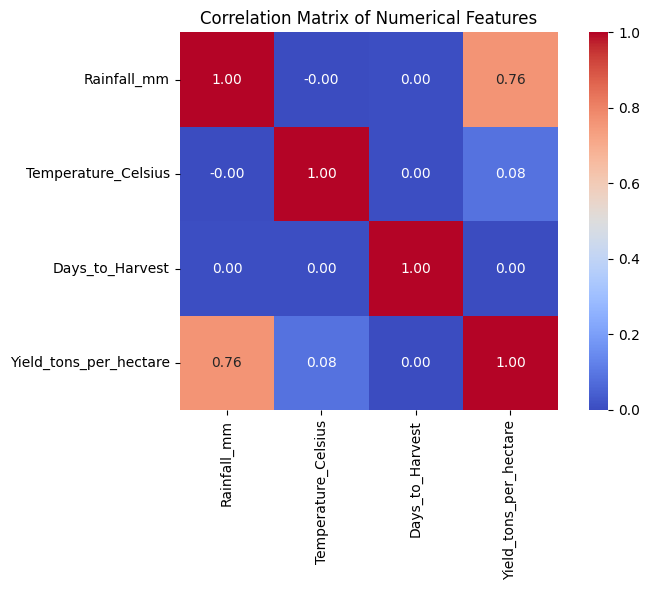

In [8]:
correlation_matrix = dataset[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

**Insight**
- Plot korelasi menunjukkan tidak ada hubungan yang kuat antara fitur sehingga tidak ada masalah multikolieritas yang dapat menurunkan performa model.
- `Rainfall_mm` dan `Yield_tons_per_hectare` memiliki korelasi paling kuat di antara fitur lainnya.

### Histogram Fitur Numerik

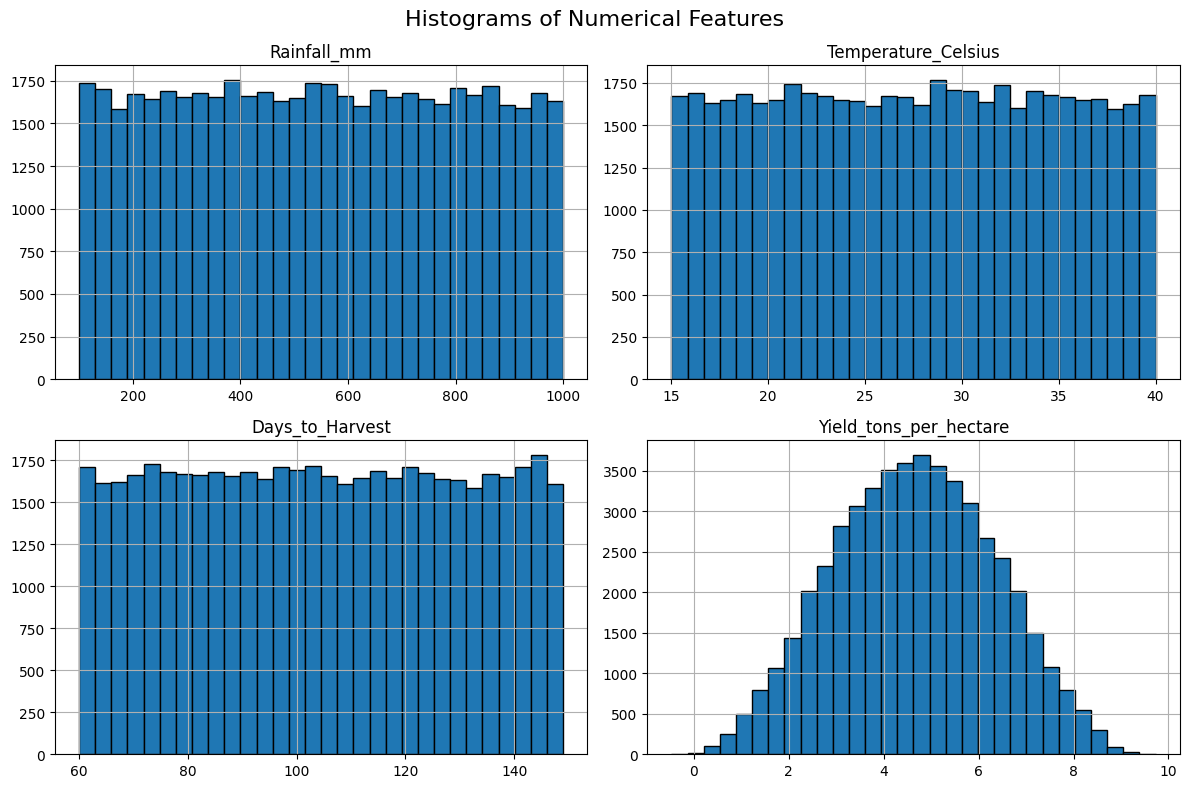

In [9]:
numerical_df = dataset[numerical_features]

numerical_df.hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

**Insight:**
- Fitur numerik cenderung memiliki distribusi yang seragam.
- Fitur target, yaitu `Yields_tons_per_hectare` memiliki distribusi normal.

### Boxplot

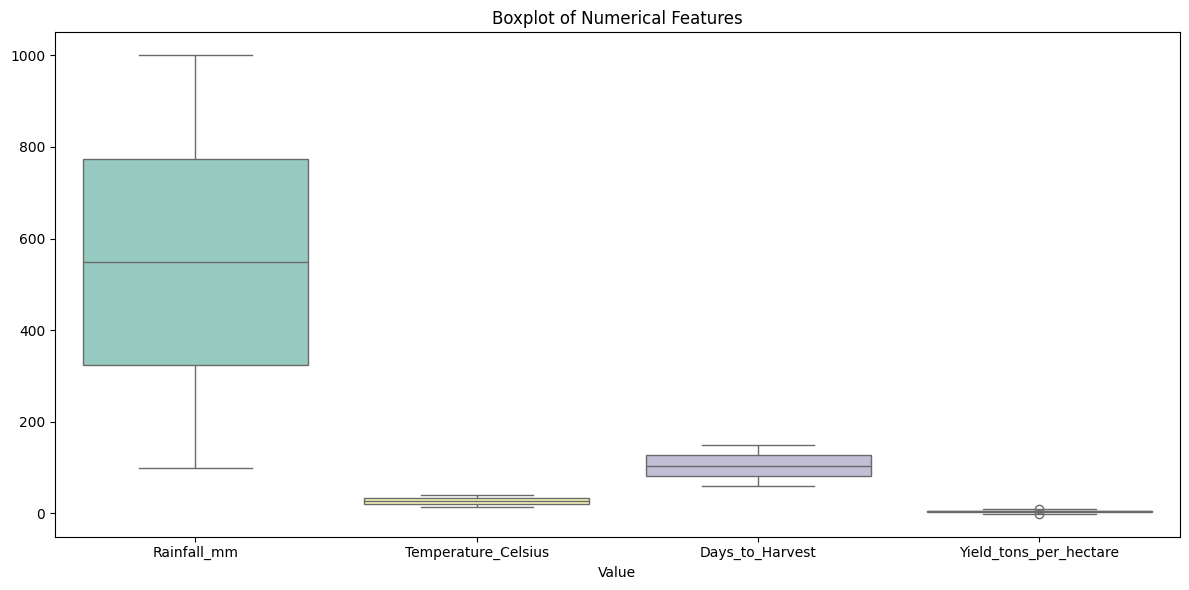

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_df, palette='Set3')
plt.title("Boxplot of Numerical Features")
plt.xlabel("Value")
plt.tight_layout()
plt.show()

**Insight:**  
- Boxplot menunjukkan besaran nilai yang sangat berbeda untuk setiap fitur.
- Pada `Yield_tons_per_hectare`, data terlihat memiliki beberapan pencilan.

### Bar Chart Fitur Kategorik

C:\Users\hp14s\AppData\Local\Temp\ipykernel_16644\2129193687.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, order=dataset[col].value_counts().index, palette="Set2")
C:\Users\hp14s\AppData\Local\Temp\ipykernel_16644\2129193687.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, order=dataset[col].value_counts().index, palette="Set2")
C:\Users\hp14s\AppData\Local\Temp\ipykernel_16644\2129193687.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, order=dataset[col].value_

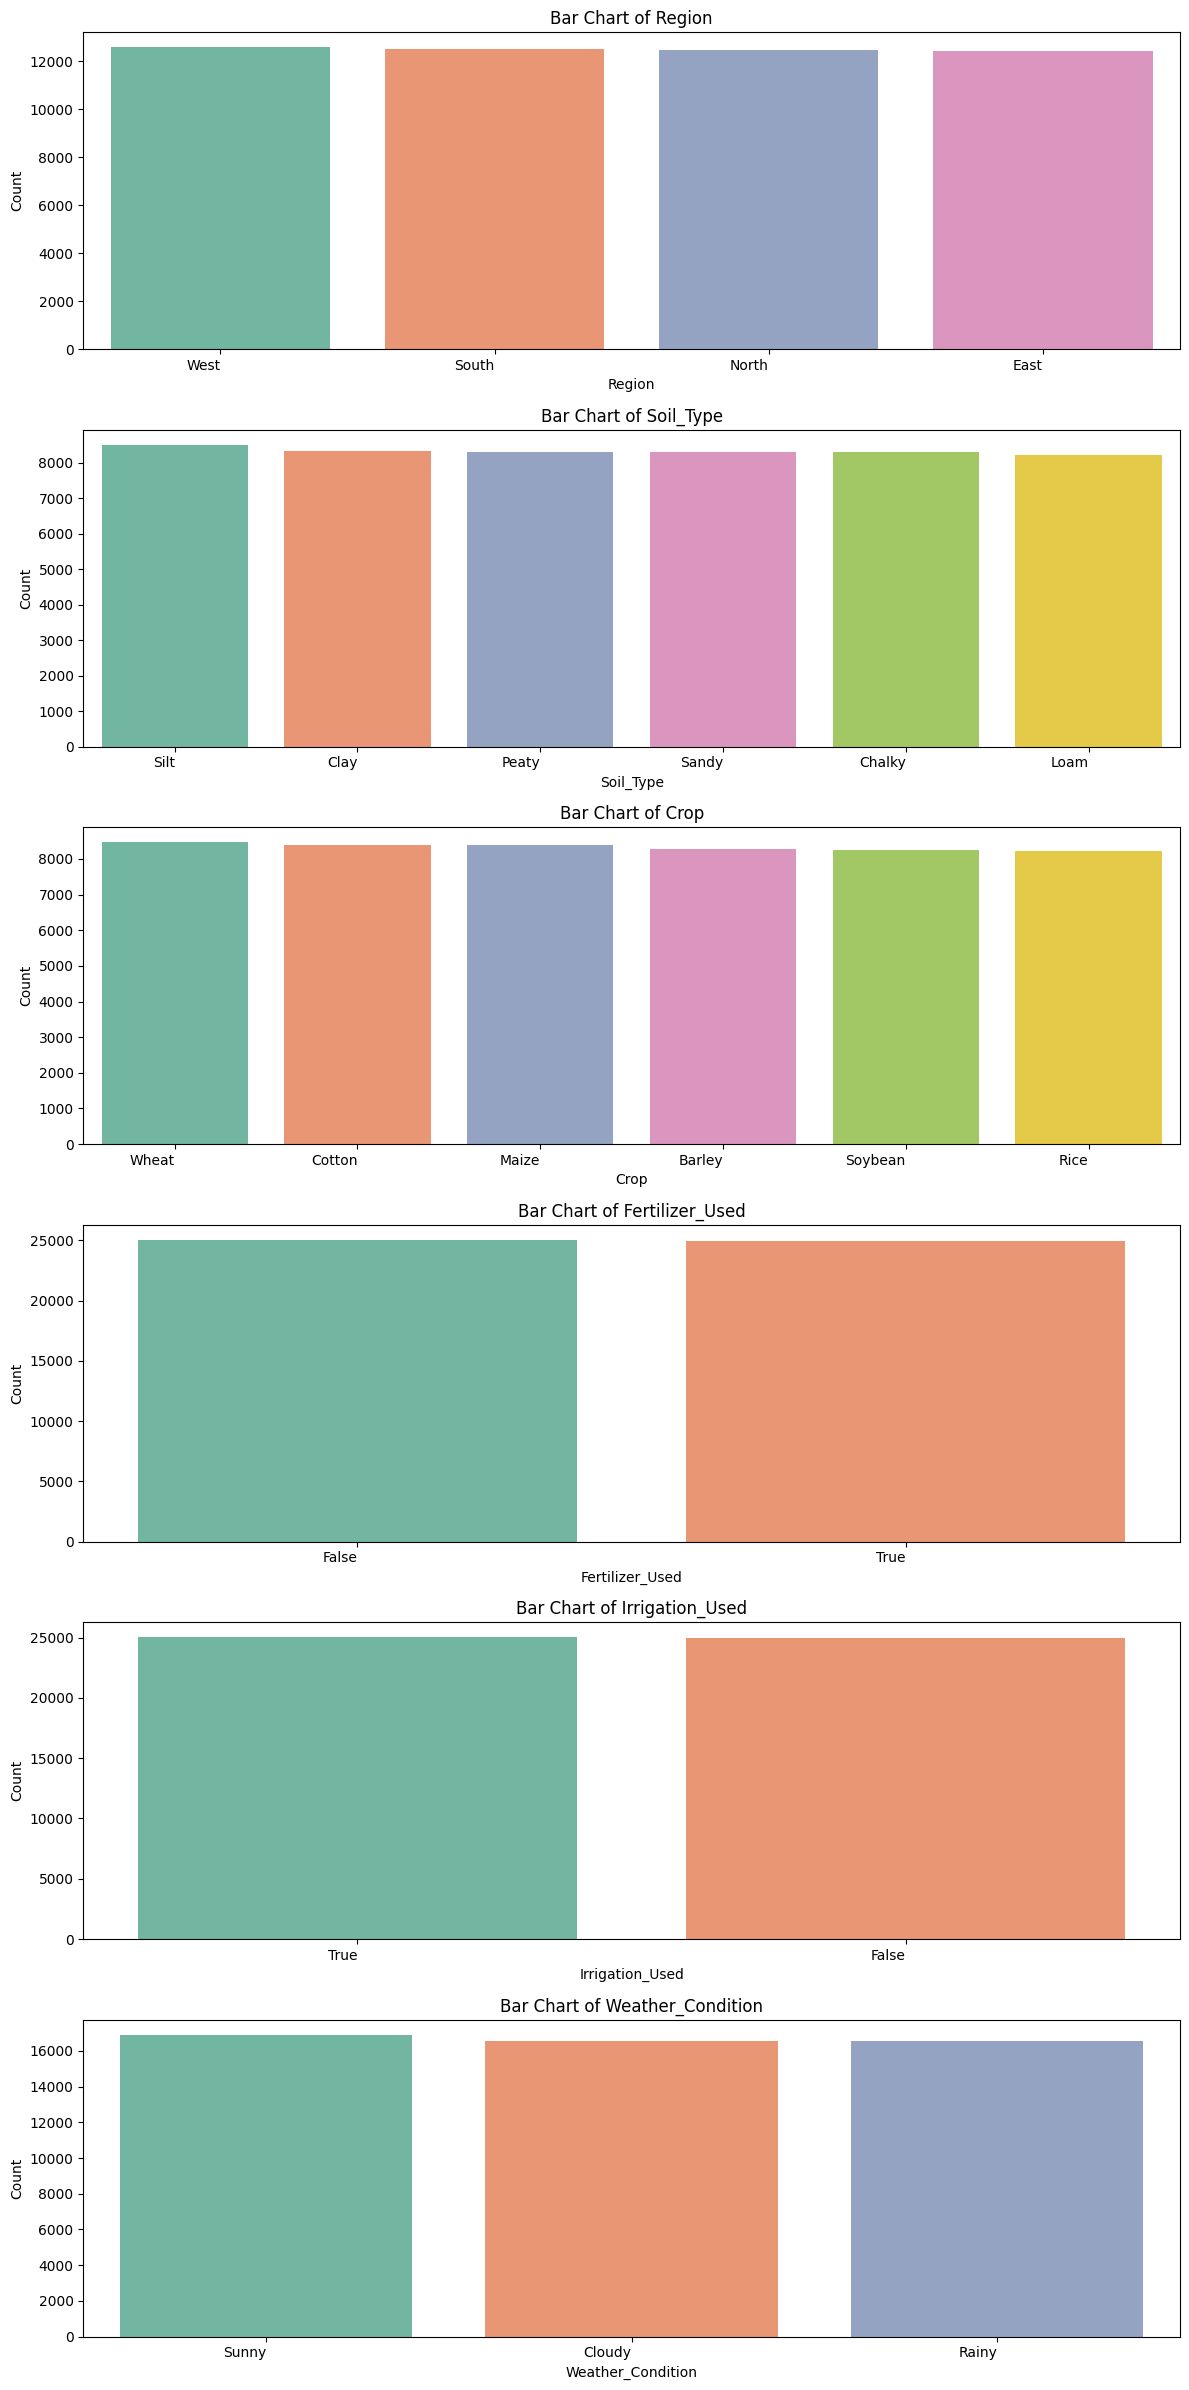

In [11]:
# Atur ukuran plot
plt.figure(figsize=(12, len(categorical_features) * 4))

# Loop untuk setiap kolom kategorikal
for i, col in enumerate(categorical_features, 1):
    plt.subplot(len(categorical_features), 1, i)
    sns.countplot(data=dataset, x=col, order=dataset[col].value_counts().index, palette="Set2")
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(ha='right')

plt.tight_layout()
plt.show()

**Insight:**  
Seluruh fitur kategorik memiliki distribusi yang cenderung seragam dan jumlah yang sama pada setiap kategori.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Pisahkan Fitur dan Target

In [12]:
numerical_features = [
    col for col in dataset.select_dtypes(include=['float64', 'int64']).columns
    if col != "Yield_tons_per_hectare"
]
categorical_features = dataset.select_dtypes(include=['object', 'bool']).columns.tolist()

## Drop Fitur yang Tidak Relevan

In [13]:
clean_df = dataset.copy()
clean_df = clean_df.drop(columns="Region")

**Insight:**  
Fitur `Region` telah dihapus dari dataset karena tidak relevan dengan analisis.

## Penghapusan Outlier

In [14]:
for col in numerical_features:
    Q1 = clean_df[col].quantile(0.25)
    Q3 = clean_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Hapus baris yang nilai kolomnya di luar batas IQR
    clean_df = clean_df[(clean_df[col] >= lower_bound) & (clean_df[col] <= upper_bound)]

In [15]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Soil_Type               50000 non-null  object 
 1   Crop                    50000 non-null  object 
 2   Rainfall_mm             50000 non-null  float64
 3   Temperature_Celsius     50000 non-null  float64
 4   Fertilizer_Used         50000 non-null  bool   
 5   Irrigation_Used         50000 non-null  bool   
 6   Weather_Condition       50000 non-null  object 
 7   Days_to_Harvest         50000 non-null  int64  
 8   Yield_tons_per_hectare  50000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(3)
memory usage: 2.8+ MB


**Insight:**  
Setelah pengecekan outlier, dataset ternyata tidak memiliki outlier sehingga tidak ada record yang terhapus.

## Encoding Fitur Kategorik

In [16]:
soil_encoder = OneHotEncoder()
crop_encoder = OneHotEncoder()
fertilizer_encoder = OneHotEncoder()
irrigation_encoder = OneHotEncoder()
weather_encoder = OneHotEncoder()

In [17]:
# Encode masing-masing kolom
soil_encoded = soil_encoder.fit_transform(clean_df[["Soil_Type"]])
crop_encoded = crop_encoder.fit_transform(clean_df[["Crop"]])
fertilizer_encoded = fertilizer_encoder.fit_transform(clean_df[["Fertilizer_Used"]])
irrigation_encoded = irrigation_encoder.fit_transform(clean_df[["Irrigation_Used"]])
weather_encoded = weather_encoder.fit_transform(clean_df[["Weather_Condition"]])

# Ubah menjadi DataFrame
soil_df = pd.DataFrame(soil_encoded.toarray(), columns=soil_encoder.get_feature_names_out(["Soil_Type"]), index=clean_df.index)
crop_df = pd.DataFrame(crop_encoded.toarray(), columns=crop_encoder.get_feature_names_out(["Crop"]), index=clean_df.index)
fertilizer_df = pd.DataFrame(fertilizer_encoded.toarray(), columns=fertilizer_encoder.get_feature_names_out(["Fertilizer_Used"]), index=clean_df.index)
irrigation_df = pd.DataFrame(irrigation_encoded.toarray(), columns=irrigation_encoder.get_feature_names_out(["Irrigation_Used"]), index=clean_df.index)
weather_df = pd.DataFrame(weather_encoded.toarray(), columns=weather_encoder.get_feature_names_out(["Weather_Condition"]), index=clean_df.index)

In [18]:
# Gabungkan semua encoding
encoded_df = pd.concat([soil_df, crop_df, fertilizer_df, irrigation_df, weather_df], axis=1)

# Drop kolom asli dari clean_df
clean_df = clean_df.drop(columns=["Soil_Type", "Crop", "Fertilizer_Used", "Irrigation_Used", "Weather_Condition"])

# Gabungkan kembali dengan clean_df
clean_df = pd.concat([clean_df, encoded_df], axis=1)

In [19]:
clean_df.head()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare,Soil_Type_Chalky,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,...,Crop_Rice,Crop_Soybean,Crop_Wheat,Fertilizer_Used_False,Fertilizer_Used_True,Irrigation_Used_False,Irrigation_Used_True,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897.077239,27.676966,122,6.555816,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,992.673282,18.026142,140,8.527341,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,147.998025,29.794042,106,1.127443,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,986.866331,16.644190,146,6.517573,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,730.379174,31.620687,110,7.248251,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


**Insight:**  
Fitur kategorik pada dataset telah di-encode menjadi numerik.

## Data Splitting

In [20]:
X = clean_df.drop(columns="Yield_tons_per_hectare")
Y = clean_df["Yield_tons_per_hectare"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Standardisasi Fitur Numerik

In [21]:
categorical_cols = [col for col in X_train.columns if col not in numerical_features]

# 1. Scaling hanya kolom numerik
X_scaler = StandardScaler()
X_train_scaled_numerical = pd.DataFrame(
    X_scaler.fit_transform(X_train[numerical_features]),
    columns=numerical_features,
    index=X_train.index
)

# 2. Gabungkan kembali dengan kolom kategorikal
X_train_final = pd.concat([X_train_scaled_numerical, X_train[categorical_cols]], axis=1)

# Inisiasi scaler
X_scaler = StandardScaler()
X_train = X_train.copy()

# Fit dan transform data training
X_train_scaled = pd.DataFrame(
    X_scaler.fit_transform(X_train[numerical_features]),
    columns=numerical_features,
    index=X_train.index
)
X_train_cat = X_train[categorical_cols]
X_train = pd.concat([X_train_scaled, X_train_cat], axis=1)

In [22]:
# Transform fitur numerik test
X_test_scaled_numerical = pd.DataFrame(
    X_scaler.transform(X_test[numerical_features]),
    columns=numerical_features,
    index=X_test.index
)

X_test_final = pd.concat([X_test_scaled_numerical, X_test[categorical_cols]], axis=1)

## Standardisasi Target

In [23]:
Y_scaler = StandardScaler()

Y_train = pd.DataFrame(
    Y_scaler.fit_transform(Y_train.values.reshape(-1, 1)),
    columns=[Y_train.name],
    index=Y_train.index
)

In [24]:
Y_test = pd.DataFrame(
    Y_scaler.transform(Y_test.values.reshape(-1, 1)),
    columns=[Y_test.name],
    index=Y_test.index
)

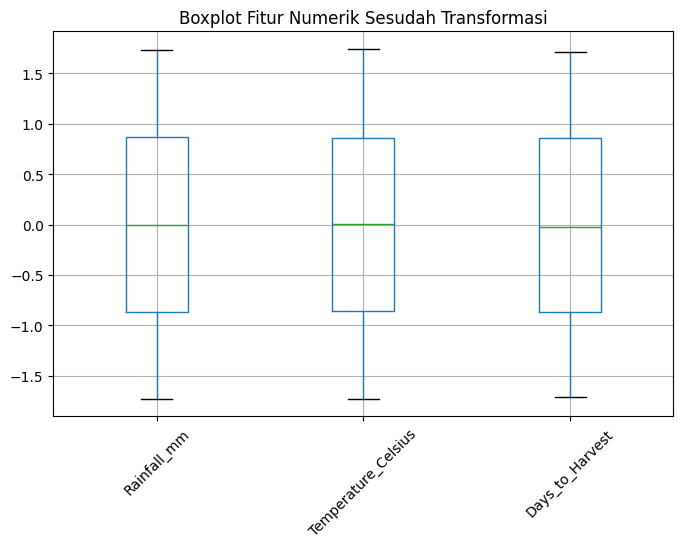

In [25]:
plt.figure(figsize=(8, 5))
X_train[numerical_features].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot Fitur Numerik Sesudah Transformasi")
plt.show()

**Insight:**  
Fitur numerik memiliki besaran yang sama setelah dilakukan transformasi.